✅ Successfully fetched weather data for New York
✅ Successfully inserted data into MySQL for New York
✅ Successfully fetched weather data for Chicago
✅ Successfully inserted data into MySQL for Chicago
✅ Successfully fetched weather data for Indiana
✅ Successfully inserted data into MySQL for Indiana
✅ Successfully fetched weather data for Los Angeles
✅ Successfully inserted data into MySQL for Los Angeles
✅ Successfully fetched weather data for Houston
✅ Successfully inserted data into MySQL for Houston
✅ Successfully fetched weather data for Miami
✅ Successfully inserted data into MySQL for Miami


C:\Users\aravi\AppData\Local\Temp\ipykernel_4924\4244779694.py:90: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


           city  temperature  humidity  wind_speed
0      New York        18.10        38        5.66
1      New York        18.10        38        5.66
2      New York        18.10        38        5.66
3      New York        18.10        38        5.66
4       Chicago        27.35        62        9.77
5       Indiana        24.99        50        6.17
6   Los Angeles        18.32        61        5.66
7       Houston        26.50        76        8.23
8         Miami        25.16        75        5.66
9      New York        17.80        39        5.66
10      Chicago        27.62        48        9.77
11      Indiana        23.98        55        4.63
12  Los Angeles        18.60        60        5.66
13      Houston        26.36        77        8.23
14        Miami        25.13        76        5.66


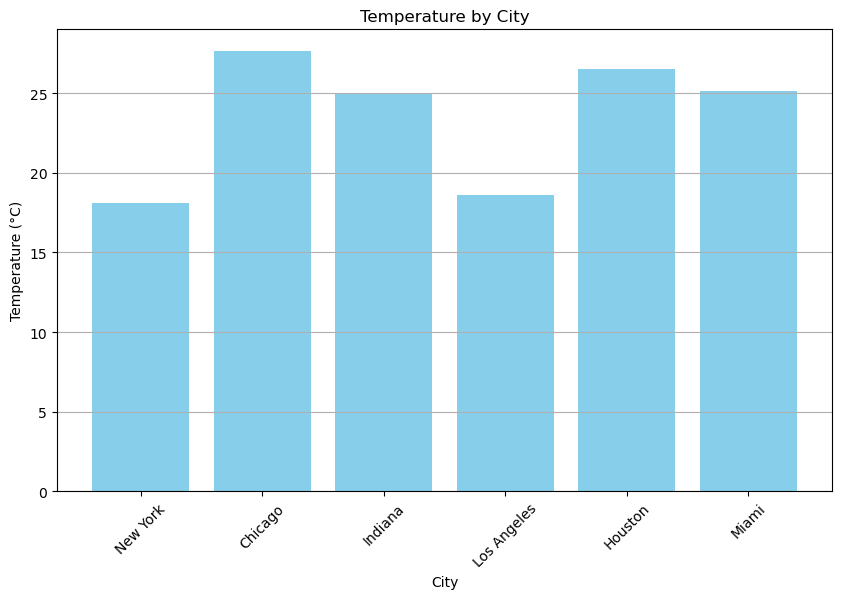

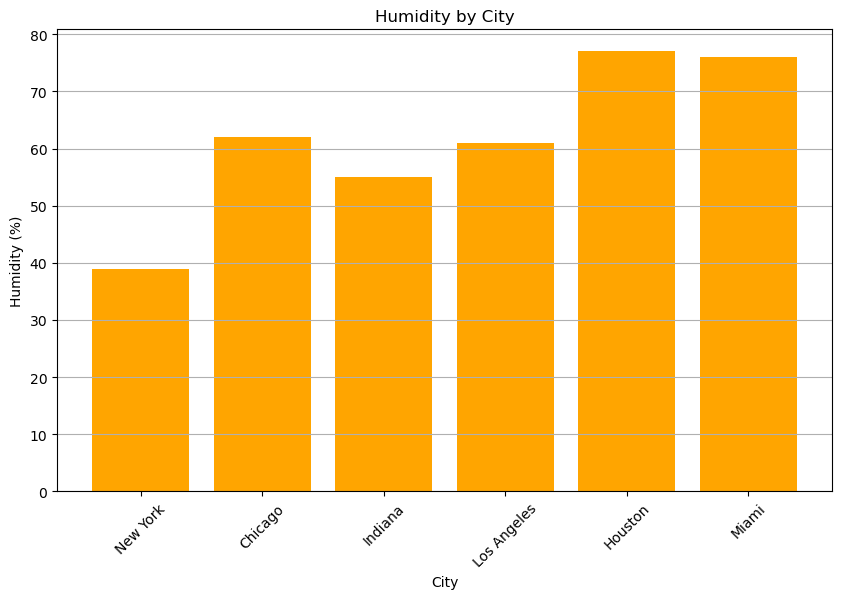

In [20]:
# Weather ETL and Visualization Project

# 1. Import Libraries
import requests
import json
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 2. Setup: API Key
token = "54e4ab8e22d910aece333fc7f996d1ae"

# 3. Define Functions

def extract_weather_data(city_name, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {'q': city_name, 'appid': api_key, 'units': 'metric'}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        print(f"✅ Successfully fetched weather data for {city_name}")
        return response.json()
    else:
        print(f"❌ Failed to fetch data for {city_name}. Status Code: {response.status_code}")
        return None


def transform_weather_data(raw_data):
    try:
        return {
            'city': raw_data['name'],
            'country': raw_data['sys']['country'],
            'temperature': raw_data['main']['temp'],
            'feels_like': raw_data['main']['feels_like'],
            'humidity': raw_data['main']['humidity'],
            'description': raw_data['weather'][0]['description'],
            'wind_speed': raw_data['wind']['speed']
        }
    except KeyError as e:
        print(f"Error extracting data: {e}")
        return None


def load_data_to_mysql(data):
    try:
        conn = mysql.connector.connect(
            host='localhost',
            user='weather_user',
            password='WeatherPass123',
            database='weather_data_db'
        )
        cursor = conn.cursor()
        insert_query = """
        INSERT INTO weather_data (city, country, temperature, feels_like, humidity, description, wind_speed)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
        """
        cursor.execute(insert_query, (
            data['city'], data['country'], data['temperature'],
            data['feels_like'], data['humidity'], data['description'],
            data['wind_speed']
        ))
        conn.commit()
        print(f"✅ Successfully inserted data into MySQL for {data['city']}")
        cursor.close()
        conn.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")

# 4. List of Cities
cities = ["New York", "Chicago", "Indiana", "Los Angeles", "Houston", "Miami"]

# 5. Extract, Transform, Load for each city
for city in cities:
    weather_data = extract_weather_data(city, token)
    if weather_data:
        transformed_data = transform_weather_data(weather_data)
        if transformed_data:
            load_data_to_mysql(transformed_data)

# 6. Visualization
# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='weather_user',
    password='WeatherPass123',
    database='weather_data_db'
)

# Read data into DataFrame
query = "SELECT city, temperature, humidity, wind_speed FROM weather_data"
df = pd.read_sql(query, conn)
conn.close()

# Display the DataFrame
print(df)

# Plot Temperature vs City
plt.figure(figsize=(10,6))
plt.bar(df['city'], df['temperature'], color='skyblue')
plt.title('Temperature by City')
plt.xlabel('City')
plt.ylabel('Temperature (\u00b0C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot Humidity vs City
plt.figure(figsize=(10,6))
plt.bar(df['city'], df['humidity'], color='orange')
plt.title('Humidity by City')
plt.xlabel('City')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()